# 1.Importing the datasets and libraries, check datatype, statistical summary, shape, null values ...

## 1.1 Importing Required librararies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2 Uploding the required dataset "loan_data.csv file"

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving loan_data.csv to loan_data (4).csv


### 1.3 Displaying the first 5 rows

In [3]:
loan_data=pd.read_csv("loan_data.csv")
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 1.4 Displaying the last 10 rows

In [4]:
loan_data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


1.5 Getting the information of the CSV file such as Dtype,count,column

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
print("Total number of people with bank account:"+str(len(loan_data.index)))

Total number of people with bank account:5000


### 1.6 To display the shape of the Dataset

In [7]:
print(loan_data.shape)

(5000, 14)


### 1.7 Describing the data such as count,mean ,standard deviation,max,min,..etc

In [8]:
loan_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 1.8 Verifying all the columns wheater any null values are present 

In [9]:
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2. Data Wrangling

### 2.1 Dropping the unwanted columns

In [10]:
# "ID" is not useful for analizing data because it is just a index
# "Experience" column has negatie value 
# "ZIP Code" is just an address it does not show any effect on target variables
ld=loan_data.drop(['ID','Experience',"ZIP Code"],axis=1)
ld.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
ld.head(7)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0


### 2.2 Finding correlation score between "Age"and "Experience" 

In [12]:
# since age and experience are closely related we have selected these 2 columns
x=loan_data[:]['Age']
y=loan_data[:]['Experience']
r=np.corrcoef(x,y)
print(r)

[[1.         0.99421486]
 [0.99421486 1.        ]]


## 3.Exploratory Data Analysis

### 3.1 Finding the no.of unique values present in each column

In [13]:
# This helps us to divide the columns into independent and categorical variables
ld.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### 3.2 Finding the number of people doesn't use Credit Card 

In [14]:
(ld.CCAvg==0).sum()

106

### 3.3 Value counts of all the categorical columns

In [15]:
ld.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [16]:
ld.CCAvg.value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [17]:
ld.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [18]:
ld["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [19]:
ld["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [20]:
ld["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [21]:
ld["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [22]:
ld["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

***3.4 Univariate Analysis***

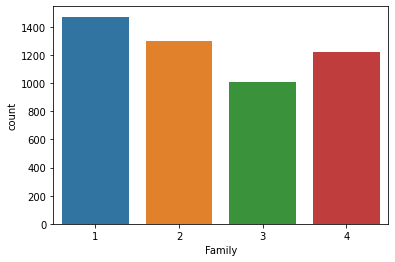

In [23]:
sns.countplot(ld.Family)

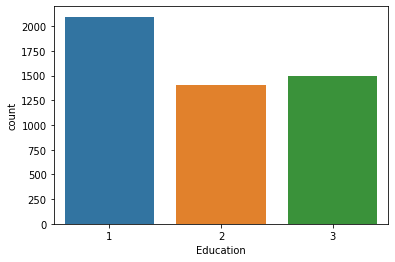

In [24]:
sns.countplot(ld.Education)

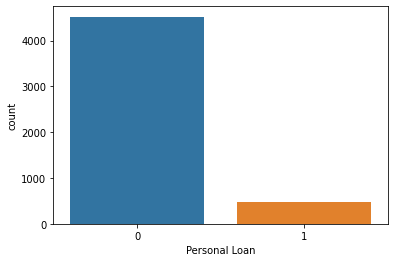

In [25]:
sns.countplot(ld["Personal Loan"])

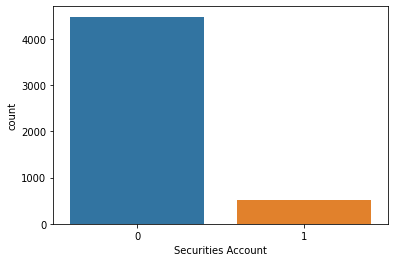

In [26]:
sns.countplot(ld["Securities Account"])

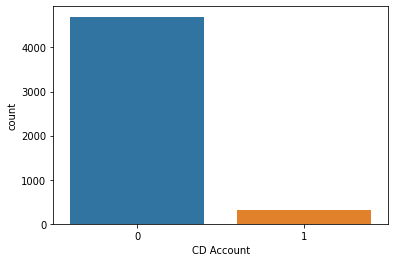

In [27]:
sns.countplot(ld["CD Account"])

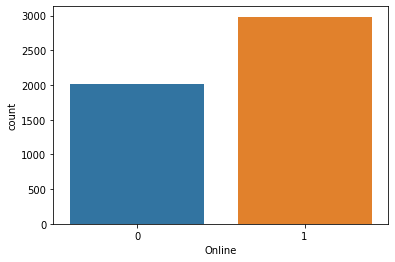

In [28]:
sns.countplot(ld["Online"])

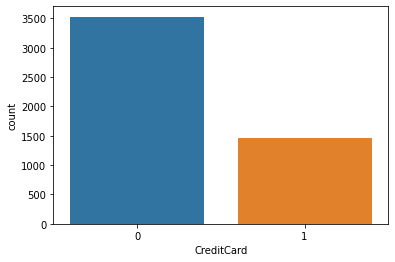

In [29]:
sns.countplot(ld["CreditCard"])

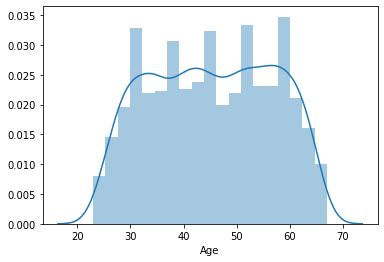

In [30]:
sns.distplot(ld.Age)
#symmetric ditrbution

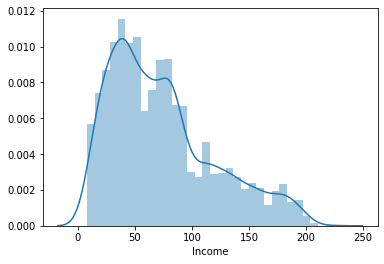

In [31]:
sns.distplot(ld.Income)
#right-skewed distribution

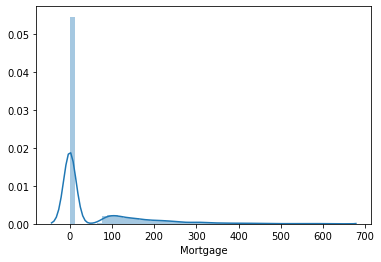

In [32]:
sns.distplot(ld.Mortgage)
#highly skewed distribution

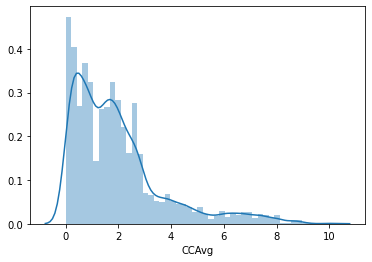

In [33]:
sns.distplot(ld.CCAvg)
#right-skewed distribution

***3.5 Multivariate Analysis***

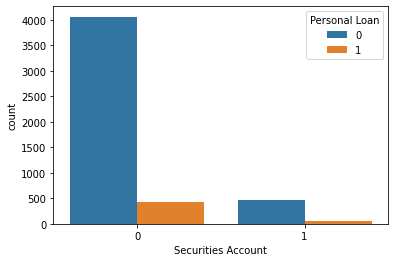

In [34]:
sns.countplot(x="Securities Account",hue="Personal Loan",data=ld)

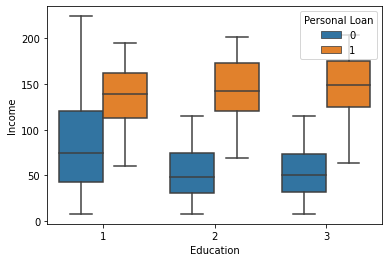

In [35]:
sns.boxplot(x="Education",y="Income",hue="Personal Loan",data=ld)

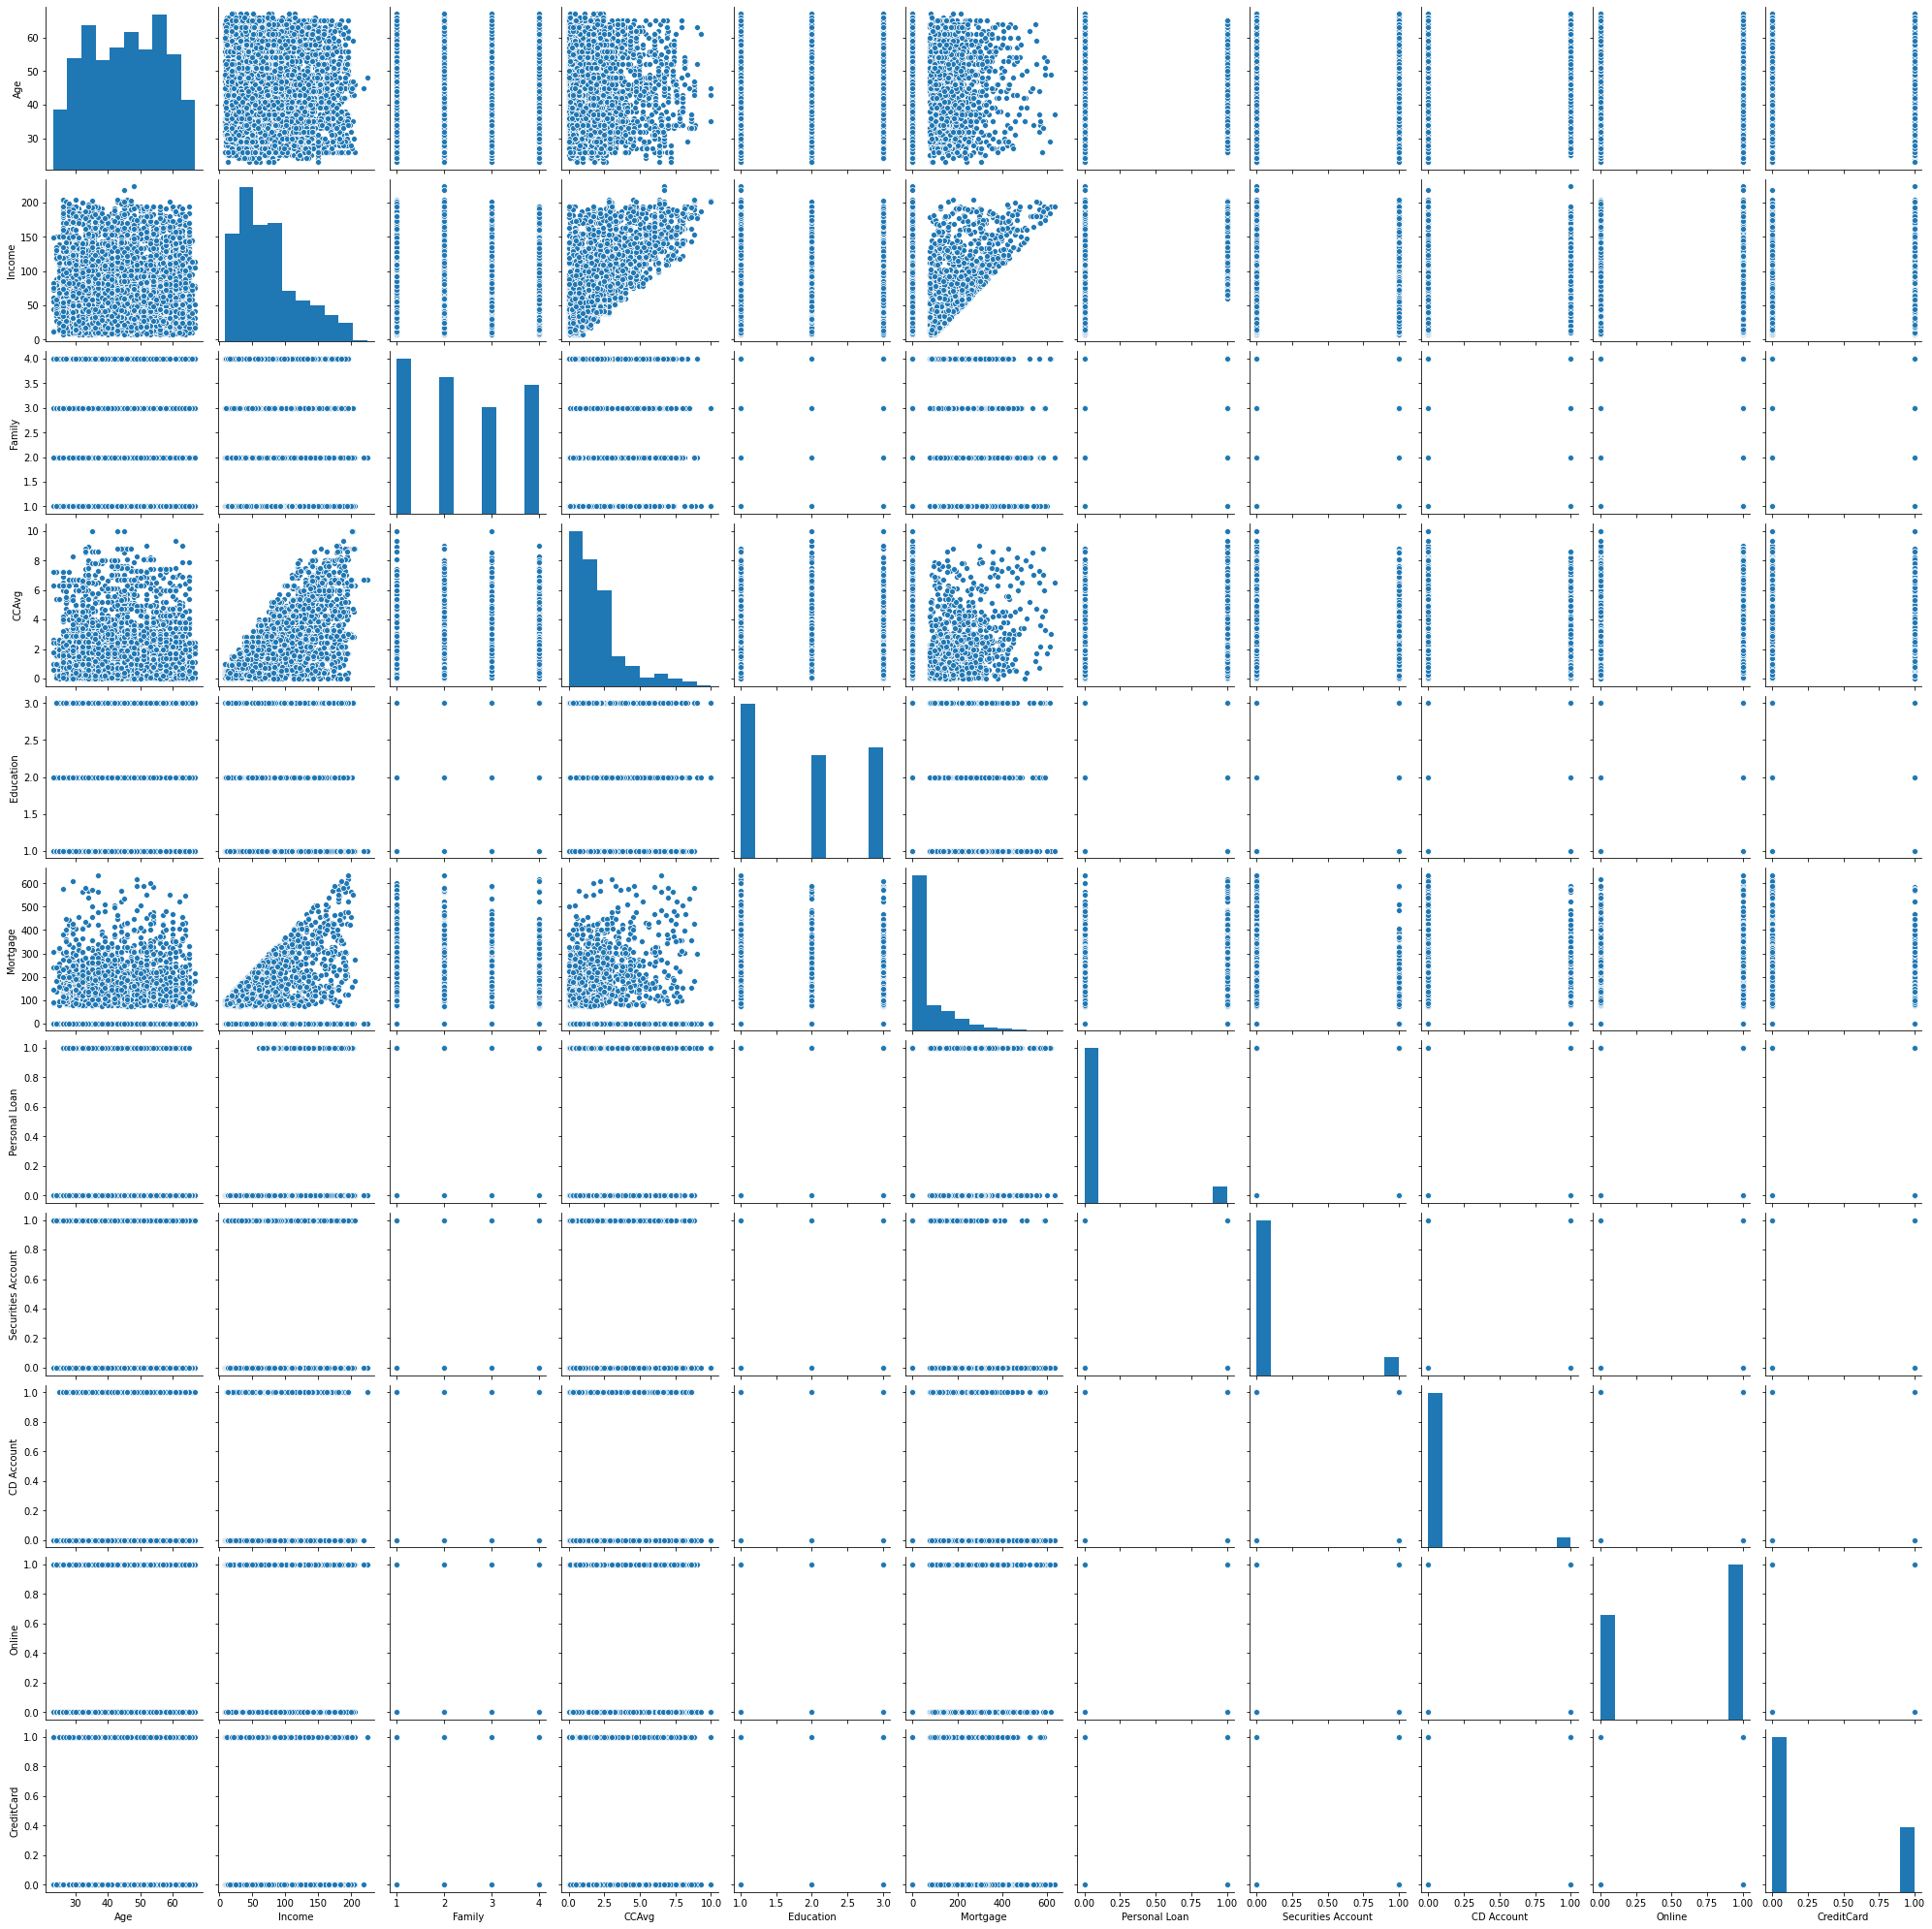

In [36]:
# pairplot is used to plot multiple pairwase bivariant distribution of datasets
sns.pairplot(ld)

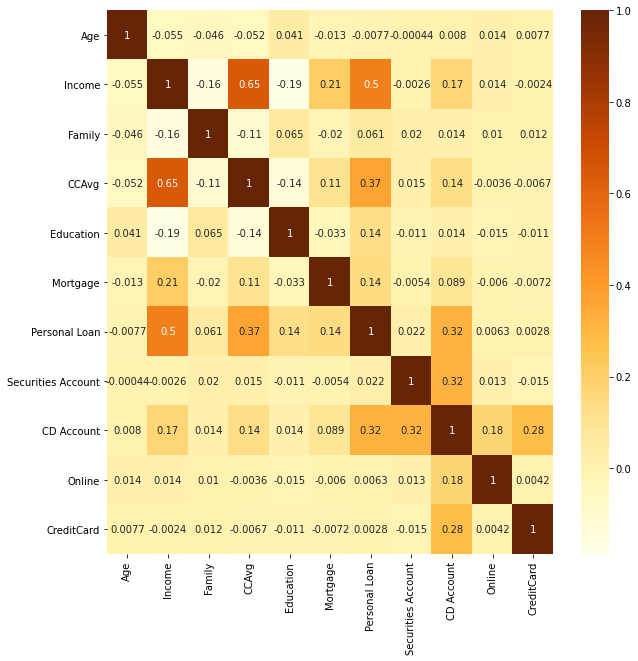

In [37]:
cgrh=plt.subplots(figsize=(10,10))
sns.heatmap(ld.corr(),cmap="YlOrBr",annot=True)

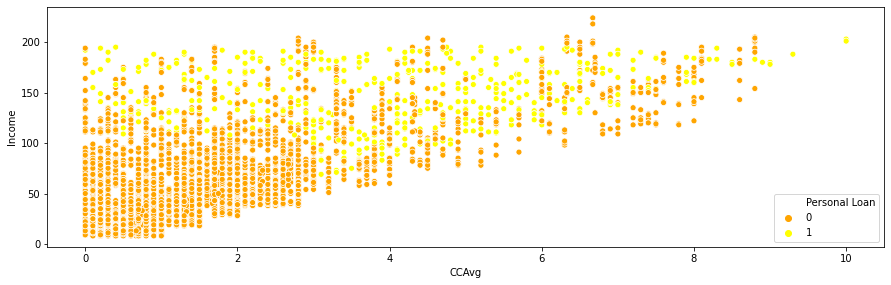

In [38]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(ld.CCAvg, ld.Income, hue = ld['Personal Loan'], palette= ['orange','yellow'])



## 4.Applying necessary Transformations¶


### 4.1 Using powertransformation on "Income" column

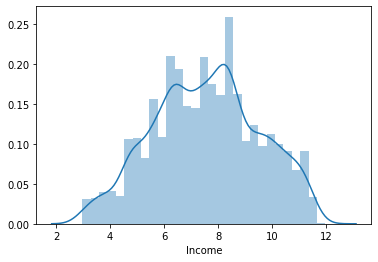

In [39]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(ld["Income"].values.reshape(-1,1))
ld["Income"]=pt.transform(ld["Income"].values.reshape(-1,1))
sns.distplot(ld["Income"])

### 4.2 Applying powertransformation on CCAvg

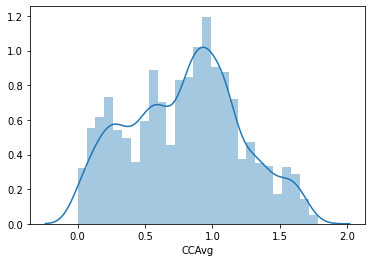

In [40]:
pt.fit(ld["CCAvg"].values.reshape(-1,1))
ld["CCAvg"]=pt.transform(ld["CCAvg"].values.reshape(-1,1))
sns.distplot(ld["CCAvg"])

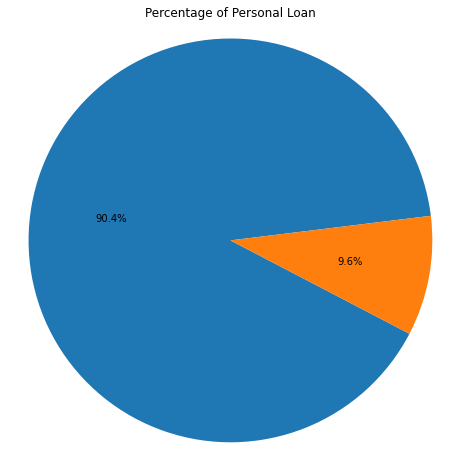

In [41]:
pc=pd.DataFrame(ld["Personal Loan"].value_counts()).reset_index()
pc.columns=["Labels","Personal Loan"]
f1,x1=plt.subplots(figsize=(8,8))
explode=(0,0.20)
x1.pie(pc["Personal Loan"],autopct="%1.1f%%",shadow=False,startangle=7)
x1.axis("equal")
plt.title("Percentage of Personal Loan")
plt.show()

In [42]:
ld["Mortgage_new"]=pd.cut(ld.Mortgage,bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
ld.drop("Mortgage",axis=1,inplace=True)
ld.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_new
0,25,6.827583,4,0.845160,1,0,1,0,0,0,0
1,45,5.876952,3,0.814478,1,0,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,0,1,0


## 5. Normalizing the data and splitting the data into 70:30 ratio

### 5.1 Splitting the data into test ratio of 70:30¶

In [43]:
x=ld.loc[:,ld.columns!="Personal Loan"]
y=ld["Personal Loan"]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=3)
x_train.head(7)

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_new
3845,26,7.097040,4,0.442182,2,0,0,0,0,2
699,44,7.765926,1,0.544710,3,0,0,0,0,0
3832,62,10.601539,2,0.978941,1,0,0,0,1,0
3046,37,7.539622,3,1.025026,1,0,0,1,0,0
1170,35,9.114475,3,0.442182,2,0,0,0,1,0
1566,61,6.287699,1,0.544710,2,0,0,1,0,1
176,52,6.537451,3,0.633777,2,0,0,1,0,1


### 5.2 Reseting the indices

In [45]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
x_train.head(5)

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_new
0,26,7.097040,4,0.442182,2,0,0,0,0,2
1,44,7.765926,1,0.544710,3,0,0,0,0,0
2,62,10.601539,2,0.978941,1,0,0,0,1,0
3,37,7.539622,3,1.025026,1,0,0,1,0,0
4,35,9.114475,3,0.442182,2,0,0,0,1,0


### 5.3 Normalizing the data using StandardScaler method

In [46]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(x_train.columns):
  scaler=StandardScaler()

  scaler.fit(x_train[[column]])

  array=scaler.transform(x_train[[column]])
  x_train.loc[:, column]=pd.Series(array.flatten())

  array=scaler.transform(x_test[[column]])
  x_test.loc[:, column]=pd.Series(array.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

### 5.4 Importing all the needed libraries and restoring the scaled values into test and train

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

## 6.Implementing various models on the data¶

### 1.Logistic Regression
### 2.RandomForestCalssifier
### 3.KNeighboursClassifer
### 4.DesicionTreeClassifier

In [48]:
LogReg=LogisticRegression(random_state=0)
knc=KNeighborsClassifier(n_neighbors=3)
dtc=DecisionTreeClassifier(random_state=0,max_depth=8)
rfc=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)


#For Logistic Regression Model
LogReg.fit(x_train,y_train.ravel())
yp_test=LogReg.predict(x_test)
yp_train=LogReg.predict(x_train)
test_score=accuracy_score(yp_test,y_test)
train_score=accuracy_score(yp_train,y_train)
print("For LogisticRegression Model")
print("For test is:",test_score)
print("For train is:",train_score)
print()

#For KNeighboursClassifier Model
knc.fit(x_train,y_train.ravel())
yp_test_kn=knc.predict(x_test)
yp_train_kn=knc.predict(x_train)
test_score_kn=accuracy_score(yp_test_kn,y_test)
train_score_kn=accuracy_score(yp_train_kn,y_train)
print("For KNeighbouClassifier Model")
print("For test is:",test_score_kn)
print("For train is:",train_score_kn)
print()


#For RandomForestClassifier Model
rfc.fit(x_train,y_train.ravel())
yp_test_rf=rfc.predict(x_test)
yp_train_rf=rfc.predict(x_train)
test_score_rf=accuracy_score(yp_test_rf,y_test)
train_score_rf=accuracy_score(yp_train_rf,y_train)
print("For RandomForestClassifier Model")
print("For test is:",test_score_rf)
print("For train is:",train_score_rf)
print()


#For DesicionTreeClassifier Model
dtc.fit(x_train,y_train.ravel())
yp_test_dt=dtc.predict(x_test)
yp_train_dt=dtc.predict(x_train)
test_score_dt=accuracy_score(yp_test_dt,y_test)
train_score_dt=accuracy_score(yp_train_dt,y_train)
print("For DesicionTreeClassifier Model")
print("For test is:",test_score_dt)
print("For train is:",train_score_dt)
print()


For LogisticRegression Model
For test is: 0.954
For train is: 0.956

For KNeighbouClassifier Model
For test is: 0.9646666666666667
For train is: 0.9774285714285714

For RandomForestClassifier Model
For test is: 0.986
For train is: 0.9948571428571429

For DesicionTreeClassifier Model
For test is: 0.9806666666666667
For train is: 0.9962857142857143




# 7. Displayng all the model's metrics¶

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1356
           1       0.82      0.67      0.74       144

    accuracy                           0.95      1500
   macro avg       0.89      0.83      0.86      1500
weighted avg       0.95      0.95      0.95      1500



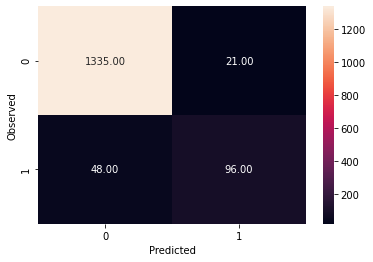

Roc Curve:
0.8255899705014749


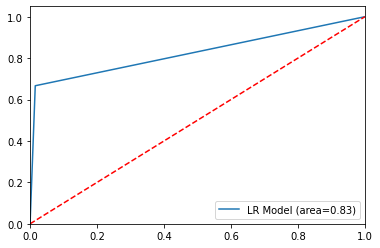

In [49]:
print(classification_report(y_test,yp_test))
sns.heatmap(confusion_matrix(y_test,yp_test),annot=True,fmt='.2f')
plt.ylabel('Observed')
plt.xlabel("Predicted")
plt.show()
print("Roc Curve:")
fpr,tpr,threshold=roc_curve(y_test,yp_test)
lr_auc_score=roc_auc_score(y_test,yp_test)
print(lr_auc_score)
plt.plot(fpr,tpr,label='LR Model (area=%0.2f)' % lr_auc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.88      0.92       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



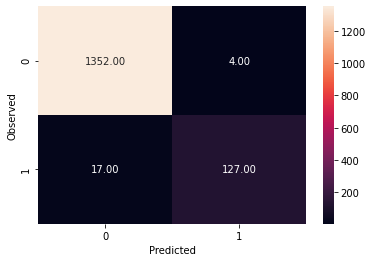

Roc Curve:


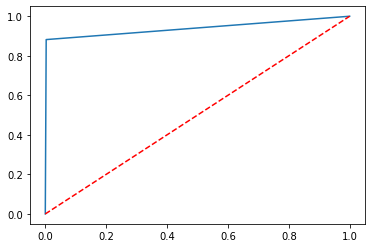

0.9394972959685349


In [50]:
print(classification_report(y_test,yp_test_rf))
sns.heatmap(confusion_matrix(y_test,yp_test_rf),annot=True,fmt='.2f')
plt.ylabel('Observed')
plt.xlabel("Predicted")
plt.show()
print("Roc Curve:")
fpr,tpr,threshold=roc_curve(y_test,yp_test_rf)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()
rf_auc_score=roc_auc_score(y_test,yp_test_rf)
print(rf_auc_score)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.88      0.92       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



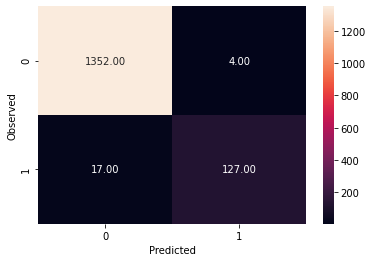

Roc Curve:


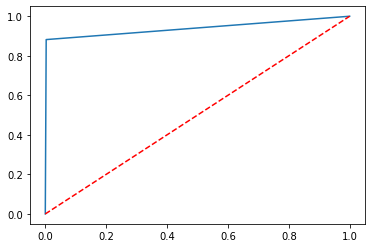

0.9394972959685349


In [51]:
print(classification_report(y_test,yp_test_rf))
sns.heatmap(confusion_matrix(y_test,yp_test_rf),annot=True,fmt='.2f')
plt.ylabel('Observed')
plt.xlabel("Predicted")
plt.show()
print("Roc Curve:")
fpr,tpr,threshold=roc_curve(y_test,yp_test_rf)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()
rf_auc_score=roc_auc_score(y_test,yp_test_rf)
print(rf_auc_score)

# 8.Comparing the performance of implemented algorithms

LR: 0.954514 (0.009533)
RF: 0.986571 (0.005338)
KNN: 0.952514 (0.008823)
DT: 0.980943 (0.006503)


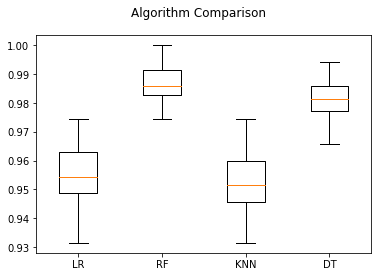

In [52]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold =RepeatedStratifiedKFold(n_splits=10, random_state=12345)
    cv_results =cross_val_score(model, x_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 9. Summary

* The classification goal is to predict the likelihood of a
liability customer buying personal loan.

* They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.

* From the above graph , it seems like 'RandomForestClassifier' algorithm have the highest accuracy and we can choose that as our final model.

* The persons who have personal loan have a higher credit card average.

* That as the members of family increases (say >=3) the necessity of loan is also increases.
* It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
* Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.
* Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
* Customers who does not have CD account, does not have loan as 
well, but almost all customers who has CD account has loan as well.